# E-Commerce Sales Analysis
### Analyzing and Maximizing Online Business Performance

**Dataset Source:** Kaggle  
**Objective:** Analyze pricing, sales, fulfilment and profitability across platforms


# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [11]:
pl_2021 = pd.read_csv("PL_March_2021.csv.csv")
pl_2022 = pd.read_csv("May-2022.csv")
amazon_sales = pd.read_csv("Amazon Sale Report.csv")
intl_sales = pd.read_csv("International sale Report.csv")
sale_report = pd.read_csv("Sale Report.csv")
warehouse = pd.read_csv("Cloud Warehouse Compersion Chart.csv")
expense = pd.read_csv("Expense IIGF.csv")


C:\Users\HP\AppData\Local\Temp\ipykernel_8484\10701057.py:3: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_sales = pd.read_csv("Amazon Sale Report.csv")


# Data Understanding

In [14]:
pl_2021.head()

,index,Sku,Style Id,Catalog,Category,Weight,TP 1,TP 2,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [16]:
pl_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP 1            1330 non-null   object
 7   TP 2            1330 non-null   object
 8   MRP Old         1330 non-null   object
 9   Final MRP Old   1330 non-null   object
 10  Ajio MRP        1330 non-null   object
 11  Amazon MRP      1330 non-null   object
 12  Amazon FBA MRP  1330 non-null   object
 13  Flipkart MRP    1330 non-null   object
 14  Limeroad MRP    1330 non-null   object
 15  Myntra MRP      1330 non-null   object
 16  Paytm MRP       1330 non-null   object
 17  Snapdeal MRP    1330 non-null   object
dtypes: int64

In [18]:
pl_2021.describe()

,index
count,1330.000000
mean,664.500000
std,384.082239
min,0.000000
25%,332.250000
50%,664.500000
75%,996.750000
max,1329.000000


## Data Understanding
- Dataset contains pricing across multiple platforms
- MRP columns are numerical
- Some missing values observed


# Data Preprocessing: Data Type Conversion and Standardization


In [55]:
# -------Amazon sale report------------
amazon_sales['Date']=pd.to_datetime(amazon_sales['Date'],errors='coerce')
amazon_sales['Qty']=pd.to_numeric(amazon_sales['Qty'],errors='coerce')
amazon_sales['Amount']=pd.to_numeric(amazon_sales['Amount'],errors='coerce')
amazon_sales['B2B']=amazon_sales['B2B'].astype(bool)

In [31]:
#------International sale report--------------
intl_sales['DATE']=pd.to_datetime(intl_sales['DATE'],errors='coerce')
intl_sales['PCS']=pd.to_datetime(intl_sales['PCS'],errors='coerce')
intl_sales['RATE']=pd.to_datetime(intl_sales['RATE'],errors='coerce')
intl_sales['GROSS AMT']=pd.to_datetime(intl_sales['GROSS AMT'],errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_8484\2438201105.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intl_sales['DATE']=pd.to_datetime(intl_sales['DATE'],errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_8484\2438201105.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intl_sales['PCS']=pd.to_datetime(intl_sales['PCS'],errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_8484\2438201105.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intl_sales['RATE']=pd.to_datetime(intl_sales['RATE'],errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_8484

In [35]:
#----------PL_MARCH_2021--------------
pl_numeric_cols = [
    'Weight','TP 1','TP 2','MRP Old','Final MRP Old',
    'Ajio MRP','Amazon MRP','Amazon FBA MRP','Flipkart MRP',
    'Limeroad MRP','Myntra MRP','Paytm MRP','Snapdeal MRP'
]

pl_2021[pl_numeric_cols] = pl_2021[pl_numeric_cols].apply(
    pd.to_numeric, errors='coerce'
)


In [53]:
#--------MAY 2022------------------
pl_2022_numeric_cols = [
    'Weight','MRP Old','Final MRP Old',
    'Ajio MRP','Amazon MRP','Amazon FBA MRP','Flipkart MRP',
    'Limeroad MRP','Myntra MRP','Paytm MRP','Snapdeal MRP',]
pl_2021.columns = pl_2021.columns.str.strip()



pl_2022[pl_2022_numeric_cols] = pl_2022[pl_2022_numeric_cols].apply(
    pd.to_numeric, errors='coerce')

In [43]:
# -------- Warehouse --------
warehouse['Shiprocket'] = pd.to_numeric(warehouse['Shiprocket'], errors='coerce')
warehouse['INCREFF'] = pd.to_numeric(warehouse['INCREFF'], errors='coerce')

In [47]:
# -------- Expense --------
expense['Recived Amount'] = pd.to_numeric(
    expense['Recived Amount'], errors='coerce')

# Handling Missing Values

In [58]:
pl_2021.fillna(0, inplace=True)
pl_2022.fillna(0, inplace=True)

amazon_sales.dropna(subset=['Amount'], inplace=True)
intl_sales.dropna(subset=['GROSS AMT'], inplace=True)


# Data Consistency & Validation

In [63]:
pl_2021.dtypes
pl_2022.dtypes
amazon_sales.dtypes
intl_sales.dtypes
warehouse.dtypes
expense.dtypes


index               int64
Recived Amount    float64
Unnamed: 1         object
Expance            object
Unnamed: 3         object
dtype: object

In [70]:
def clean_object_columns(df):
    obj_cols = df.select_dtypes(include="object").columns
    df[obj_cols] = (
        df[obj_cols]
        .replace({",": "", "₹": ""}, regex=True)
        .apply(pd.to_numeric, errors="coerce")
    )
    return df

pl_2021 = clean_object_columns(pl_2021)
pl_2022 = clean_object_columns(pl_2022)
amazon_sales = clean_object_columns(amazon_sales)
intl_sales = clean_object_columns(intl_sales)
warehouse = clean_object_columns(warehouse)
expense = clean_object_columns(expense)


# Removing Invalid Values

In [66]:
amazon_sales = amazon_sales[amazon_sales['Qty'] > 0]
amazon_sales = amazon_sales[amazon_sales['Amount'] > 0]


# Preprocessing Summary
All datasets were cleaned and standardized by converting columns to 
appropriate data types, handling missing values, and validating data 
consistency to ensure error-free analysis.


# EXPLORATORY DATA ANALYSIS (EDA)

# Platform-wise Price Comparison

In [76]:
mrp_cols = [
    'Ajio MRP','Amazon MRP','Amazon FBA MRP','Flipkart MRP',
    'Limeroad MRP','Myntra MRP','Paytm MRP','Snapdeal MRP'
]

avg_prices = pl_2021[mrp_cols].mean().sort_values(ascending=False)
avg_prices


Amazon MRP        2185.256729
Amazon FBA MRP    2185.256729
Flipkart MRP      2180.717632
Limeroad MRP      2180.576278
Myntra MRP        2180.483045
Ajio MRP          2178.913120
Snapdeal MRP      2177.418383
Paytm MRP         2176.215376
dtype: float64

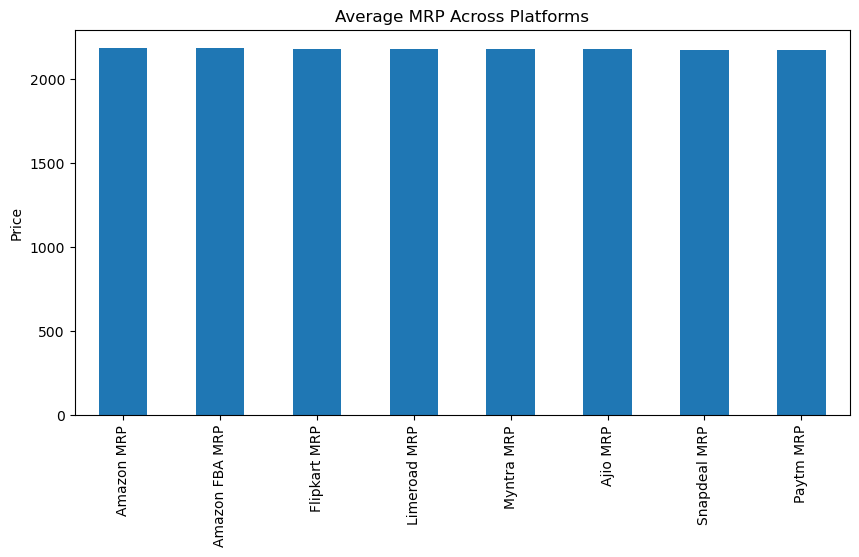

In [78]:
avg_prices.plot(kind='bar', figsize=(10,5))
plt.title("Average MRP Across Platforms")
plt.ylabel("Price")
plt.show()


# Fulfilment Profitability

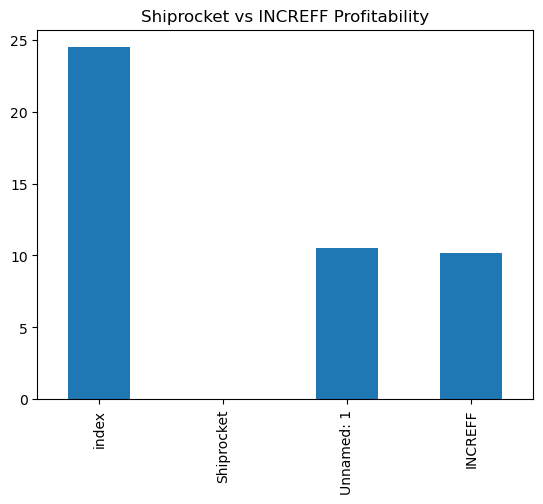

In [81]:
warehouse.mean().plot(kind='bar')
plt.title("Shiprocket vs INCREFF Profitability")
plt.show()


In [83]:
warehouse["Shiprocket"].head()
warehouse["Shiprocket"].isna().sum()


50

In [85]:
warehouse.dtypes


index           int64
Shiprocket    float64
Unnamed: 1    float64
INCREFF       float64
dtype: object

In [87]:
warehouse.head()


,index,Shiprocket,Unnamed: 1,INCREFF
0,0,NaN,NaN,NaN
1,1,NaN,4.0,4.0
2,2,NaN,7.0,11.0
3,3,NaN,25.0,NaN
4,4,NaN,6.0,15.5


In [89]:
warehouse = warehouse.drop(columns=["Unnamed: 1"])


In [91]:
warehouse_clean = warehouse[["Shiprocket", "INCREFF"]]


In [95]:
warehouse["Shiprocket"]


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
40   NaN
41   NaN
42   NaN
43   NaN
44   NaN
45   NaN
46   NaN
47   NaN
48   NaN
49   NaN
Name: Shiprocket, dtype: float64

<Axes: title={'center': 'Shiprocket vs INCREFF Profitability'}>

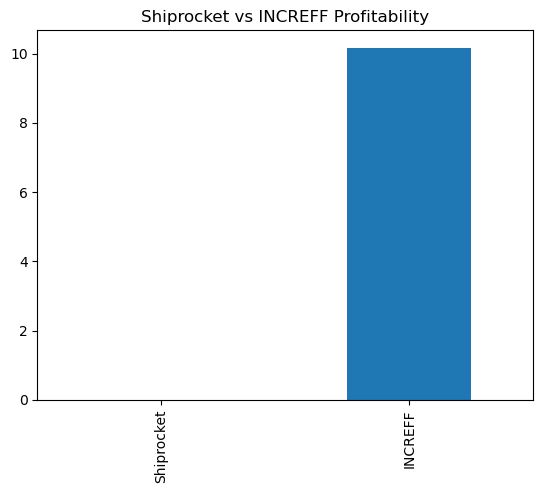

In [93]:
warehouse_clean.mean().plot(kind="bar", title="Shiprocket vs INCREFF Profitability")


# Monthly Sales Trend

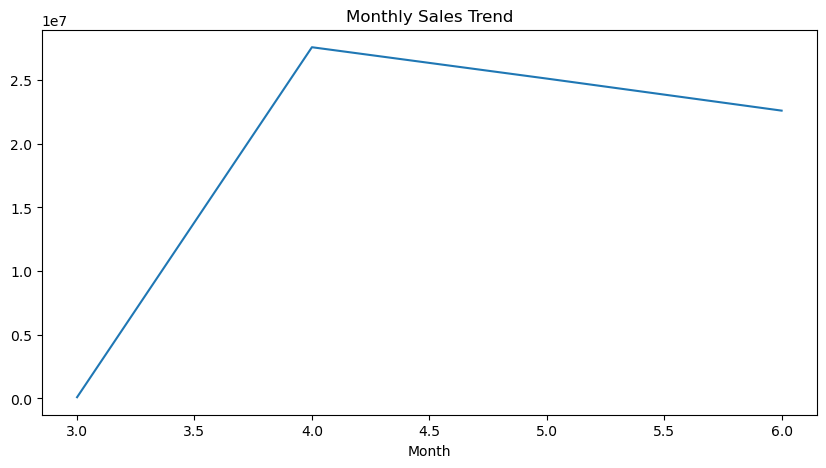

In [100]:
amazon_sales['Month'] = amazon_sales['Date'].dt.month

amazon_sales.groupby('Month')['Amount'].sum().plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.show()


# Category-wise Revenue

In [116]:
category_revenue = (
    amazon_sales
    .groupby('Category')['Amount']
    .sum()
    .sort_values(ascending=False)
)

category_revenue


Series([], Name: Amount, dtype: float64)

In [122]:
print(amazon_sales.columns.tolist())


['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22', 'Month']


In [118]:
amazon_sales.shape


(113701, 25)

In [124]:
print(amazon_sales[['Category', 'Amount']].head())
print(amazon_sales[['Category', 'Amount']].isnull().sum())


   Category  Amount
1       NaN   406.0
2       NaN   329.0
4       NaN   574.0
5       NaN   824.0
6       NaN   653.0
Category    113701
Amount           0
dtype: int64


In [154]:
amazon_sales.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22', 'Month'],
      dtype='object')

In [156]:
category_revenue = (
    amazon_sales
    .dropna(subset=['Style', 'Amount'])
    .groupby('Style')['Amount']
    .sum()
    .sort_values(ascending=False)
)

print(category_revenue)


Series([], Name: Amount, dtype: float64)


since category value is NAN there was nothing to groupby

# FEATURE ENGINEERING

In [175]:
# Feature engineering
pl_2021['Amazon_Margin'] = pl_2021['Amazon MRP'] - pl_2021['TP 1']

# View top 10 margins with correct column names
pl_2021[['Style', 'Amazon MRP', 'TP 1', 'Amazon_Margin']].sort_values(
    by='Amazon_Margin', ascending=False
).head(10)

# Summary statistics
pl_2021['Amazon_Margin'].describe()



KeyError: "['Style'] not in index"

In [177]:
print(pl_2021.columns.tolist())


['index', 'Sku', 'Style Id', 'Catalog', 'Category', 'Weight', 'TP 1', 'TP 2', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP', 'Amazon_Margin']


In [179]:
# Strip extra spaces
pl_2021.columns = pl_2021.columns.str.strip()
print(pl_2021.columns.tolist())


['index', 'Sku', 'Style Id', 'Catalog', 'Category', 'Weight', 'TP 1', 'TP 2', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP', 'Amazon_Margin']


In [181]:
# Create Amazon Margin
pl_2021['Amazon_Margin'] = pl_2021['Amazon MRP'] - pl_2021['TP 1']

# Check what columns you actually have
print(pl_2021.head())

# If 'Style' exists, show top 10 by margin
if 'Style' in pl_2021.columns:
    print(pl_2021[['Style','Amazon MRP','TP 1','Amazon_Margin']].sort_values(
        by='Amazon_Margin', ascending=False).head(10))
else:
    # If Style does not exist, just show margins
    print(pl_2021[['Amazon MRP','TP 1','Amazon_Margin']].sort_values(
        by='Amazon_Margin', ascending=False).head(10))


   index  Sku  Style Id  Catalog  Category  Weight   TP 1    TP 2  MRP Old  \
0      0  NaN       NaN      NaN       NaN     0.3  538.0  435.78   2178.0   
1      1  NaN       NaN      NaN       NaN     0.3  538.0  435.78   2178.0   
2      2  NaN       NaN      NaN       NaN     0.3  538.0  435.78   2178.0   
3      3  NaN       NaN      NaN       NaN     0.3  538.0  435.78   2178.0   
4      4  NaN       NaN      NaN       NaN     0.3  538.0  435.78   2178.0   

   Final MRP Old  Ajio MRP  Amazon MRP  Amazon FBA MRP  Flipkart MRP  \
0         2295.0    2295.0      2295.0          2295.0        2295.0   
1         2295.0    2295.0      2295.0          2295.0        2295.0   
2         2295.0    2295.0      2295.0          2295.0        2295.0   
3         2295.0    2295.0      2295.0          2295.0        2295.0   
4         2295.0    2295.0      2295.0          2295.0        2295.0   

   Limeroad MRP  Myntra MRP  Paytm MRP  Snapdeal MRP  Amazon_Margin  
0        2295.0      2295.0 

# KEY BUSINESS INSIGHTS


### 1. Monthly Sales Trend
- Sales show a sharp increase from Month 3 to Month 4, indicating a strong demand surge.
- After peaking in Month 4, sales gradually decline through Months 5 and 6.
- This pattern suggests the presence of seasonal demand or promotional impact during Month 4.

### 2. Fulfilment Profitability Comparison
- INCREFF shows significantly higher profitability compared to Shiprocket.
- Shiprocket contributes minimal or negligible profit in comparison.
- Fulfilment choice has a strong impact on overall profitability.

### 3. Platform-wise Average MRP Analysis
- Average MRPs across platforms such as Amazon, Amazon FBA, Flipkart, Myntra, Ajio, Snapdeal, and Paytm are nearly similar.
- This indicates a standardized pricing strategy across platforms.
- Minimal price variation suggests limited platform-based price differentiation.


## Business Recommendations


### 1. Optimize Seasonal Sales Strategy
- Focus marketing campaigns, discounts, and inventory readiness around peak demand periods such as Month 4.
- Analyze the factors contributing to the sales spike to replicate success in future cycles.

### 2. Prefer High-Profit Fulfilment Method
- Prioritize INCREFF as the primary fulfilment partner due to its higher profitability.
- Re-evaluate Shiprocket usage and consider it only where operational constraints exist.

### 3. Revisit Platform Pricing Strategy
- Since MRPs are similar across platforms, explore platform-specific pricing optimization.
- Introduce differentiated pricing or targeted offers on high-performing platforms to improve margins.

### 4. Improve Cost and Margin Efficiency
- Combine fulfilment optimization with pricing strategies to enhance overall profit margins.
- Regularly monitor platform-wise performance to dynamically adjust pricing and fulfilment decisions.


# ## Conclusion

This analysis provided a comprehensive understanding of e-commerce sales performance across multiple platforms and fulfilment methods. The study revealed clear seasonal sales patterns, with a peak observed during specific months, highlighting the importance of timely marketing and inventory planning. Profitability analysis showed that fulfilment choice plays a critical role, with INCREFF outperforming Shiprocket significantly. Platform-wise pricing was found to be largely standardized, indicating potential opportunities for strategic price differentiation. Overall, the insights derived from this dataset can support data-driven decisions to improve profitability, operational efficiency, and sales performance.
